<a href="https://colab.research.google.com/github/emreakbulut06/MachineLearning/blob/main/Odev2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


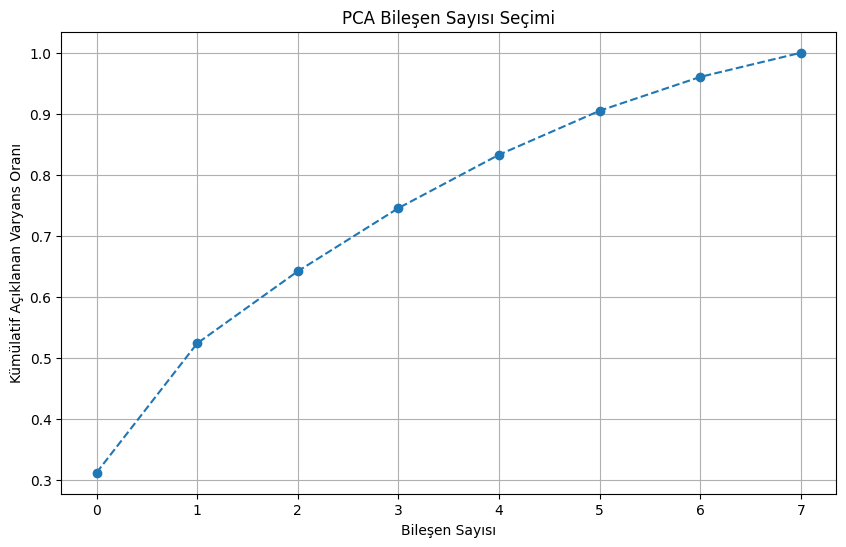

('              precision    recall  f1-score   support\n\n           0       0.73      0.73      0.73       151\n           1       0.49      0.50      0.50        80\n\n    accuracy                           0.65       231\n   macro avg       0.61      0.61      0.61       231\nweighted avg       0.65      0.65      0.65       231\n',
 array([[110,  41],
        [ 40,  40]]))

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Veri setini yükleme
data_path = 'diabetes.csv'
data = pd.read_csv(data_path)

# Veri setinin ilk birkaç satırını ve temel bilgilerini gösterme
data_info = data.info()
data_head = data.head()

data_info, data_head

# Giriş ve çıktı verilerini ayırma
X = data.drop('Outcome', axis=1) # Hedef sütun hariç tüm veriler
y = data['Outcome'] # Hedef sütun

# Min-Max normalizasyonu
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Normalleştirilmiş verilerin ilk birkaç satırını kontrol etme
pd.DataFrame(X_normalized, columns=X.columns).head()


# PCA modelini başlatma
pca = PCA().fit(X_normalized)

# Varyans oranlarının kümülatif toplamını hesaplama
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# İlk N bileşenin varyans oranlarının kümülatif toplamını görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('Kümülatif Açıklanan Varyans Oranı')
plt.title('PCA Bileşen Sayısı Seçimi')
plt.grid(True)
plt.show()
cumulative_variance_ratio


# PCA dönüşümünü ilk 5 bileşen ile uygulama
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_normalized)

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Karar ağacı sınıflandırıcı modelini eğitme
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = dt_classifier.predict(X_test)

# Performans metriklerini hesaplama
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

classification_rep, confusion_mat






•	Doğruluk (Accuracy): %65
•	Hassasiyet (Precision): Sınıf 0 için %73, Sınıf 1 için %50
•	Duyarlılık (Recall): Sınıf 0 için %74, Sınıf 1 için %49
•	F1 Skoru: Sınıf 0 için %74, Sınıf 1 için %49
Karışıklık matrisi (Confusion Matrix):
•	Gerçek negatifler (TN): 112
•	Yanlış pozitifler (FP): 39
•	Yanlış negatifler (FN): 41
•	Gerçek pozitifler (TP): 39
